In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

C:\Users\atill\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
print("The shape of the train set is {}".format(train.shape))
print("The shape of the test set is {}".format(test.shape))

The shape of the train set is (381109, 12)
The shape of the test set is (127037, 11)


In [12]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [13]:
test.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [14]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [15]:
test.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [16]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [17]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [21]:
train = train.drop(["id"],axis=1)
test_id = test["id"]
test= test.drop(["id"],axis=1)

## Exploratory Data Analysis

In [22]:
numerical_columns = train.select_dtypes(include = ("int64","float64"))
numerical_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


## Response vs Some Categorical Variables

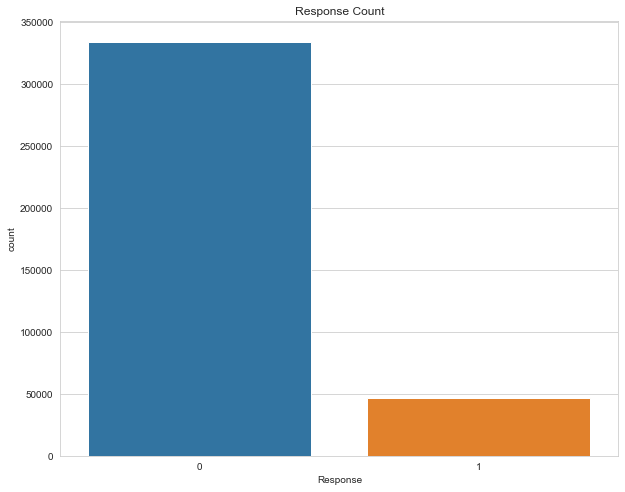

In [36]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
graph = sns.countplot(x = "Response",data=train).set_title("Response Count")


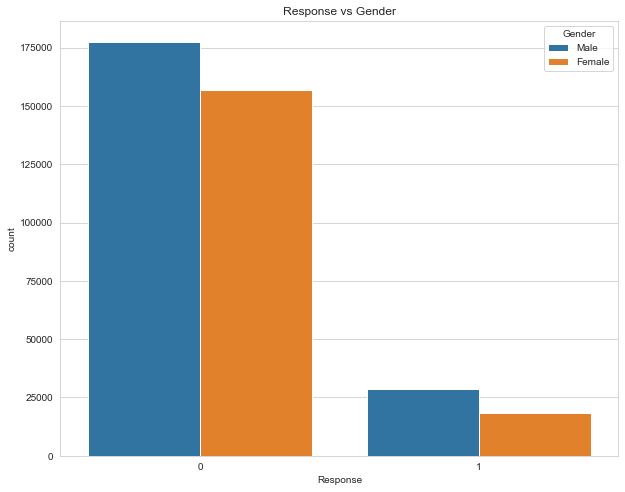

In [55]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
graph = sns.countplot(x = "Response",data=train,hue="Gender").set_title("Response vs Gender")


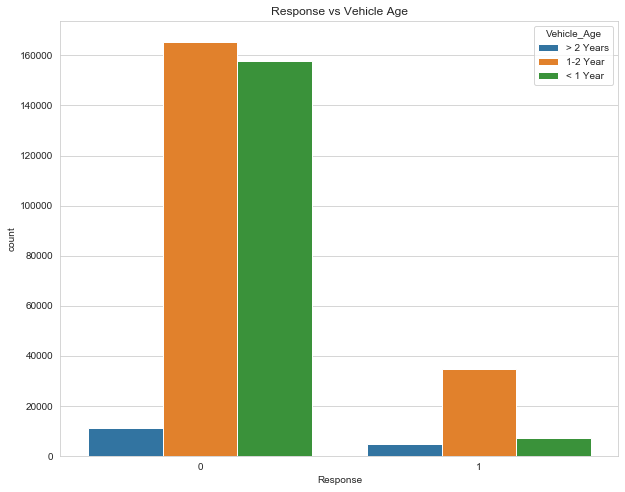

In [56]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
graph = sns.countplot(x = "Response",data=train,hue="Vehicle_Age").set_title("Response vs Vehicle Age")


## Age 

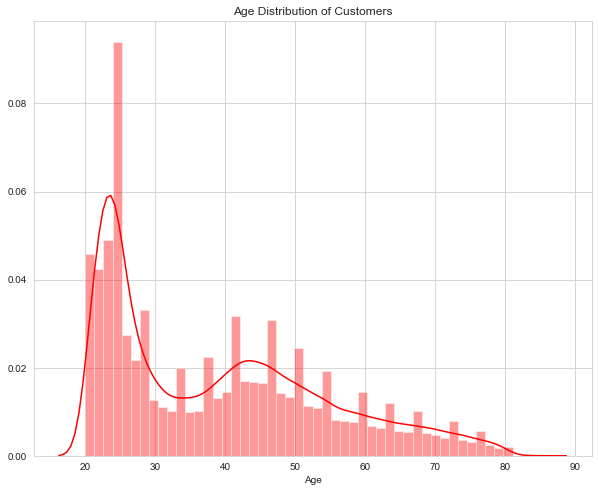

In [62]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
graph = sns.distplot(train.Age,color="red").set_title("Age Distribution of Customers")

<Figure size 720x576 with 0 Axes>

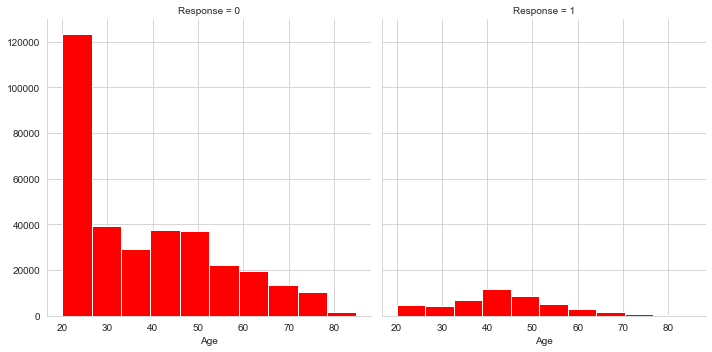

In [66]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
g = sns.FacetGrid(train, col='Response', height=5)
g.map(plt.hist, "Age",color="red");


## Annual Premium

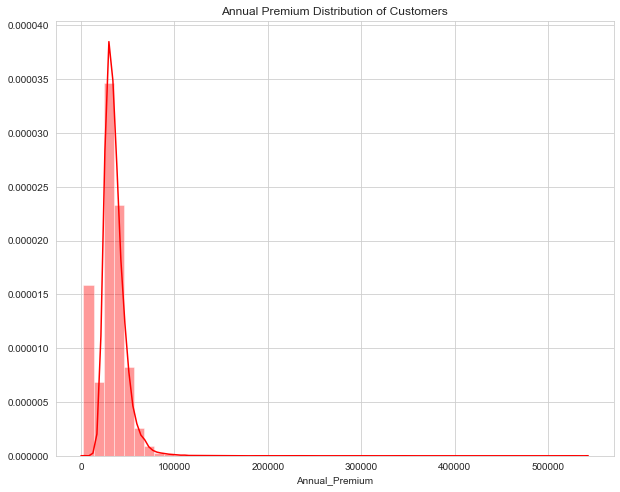

In [67]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
graph = sns.distplot(train.Annual_Premium,color="red").set_title("Annual Premium Distribution of Customers")

<Figure size 720x576 with 0 Axes>

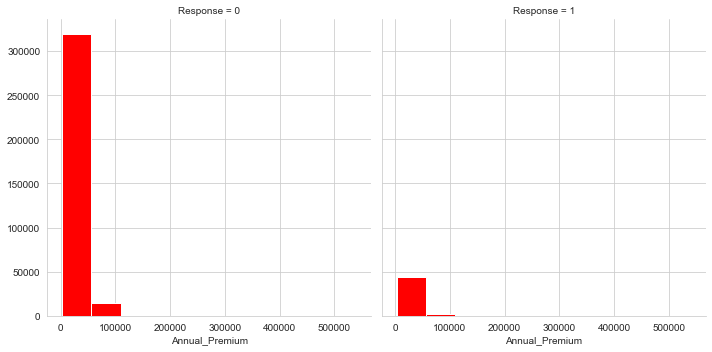

In [68]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
g = sns.FacetGrid(train, col='Response', height=5)
g.map(plt.hist, "Annual_Premium",color="red");


<Figure size 720x576 with 0 Axes>

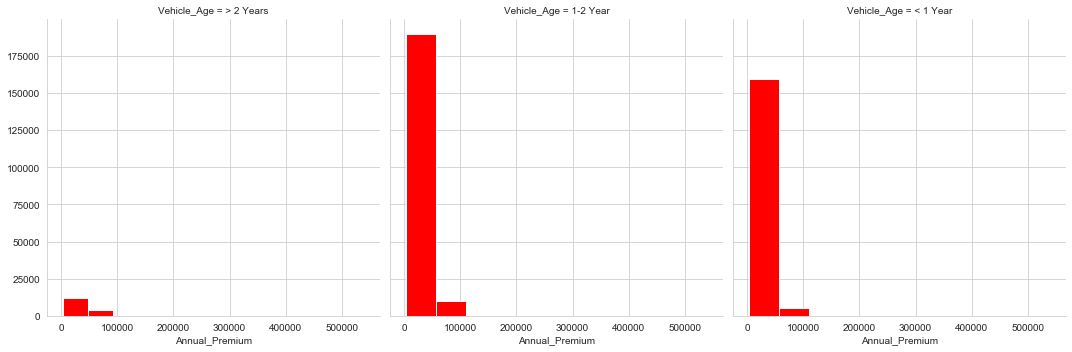

In [70]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
g = sns.FacetGrid(train, col='Vehicle_Age', height=5)
g.map(plt.hist, "Annual_Premium",color="red");

## Model Preprocessing

In [71]:
y = train.Response.values
train.drop(["Response"],axis=1,inplace = True)

In [72]:
fulldata = pd.concat([train,test],axis=0)

In [74]:
print("the shape of fulldata is {}".format(fulldata.shape))

the shape of fulldata is (508146, 10)


In [75]:
fulldata.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [76]:
numerical_columns = fulldata.select_dtypes(include=("int64","float64"))
categorical_columns = fulldata.select_dtypes(include=("object"))

Label Encoding for Categorical Variables

In [77]:
from sklearn.preprocessing import LabelEncoder
for column in categorical_columns:
    fulldata[column] = LabelEncoder().fit_transform(fulldata[column])

Min - Max Scaling Numerical Variables

In [88]:
from sklearn import preprocessing
scaler = MinMaxScaler()
for column in numerical_columns:
    fulldata[column] = scaler.fit_transform(fulldata[[column]])

In [89]:
fulldata.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,0.369231,1.0,0.538462,0.0,2,1,0.070366,0.154321,0.716263
1,1,0.861538,1.0,0.057692,0.0,0,0,0.057496,0.154321,0.598616
2,1,0.415385,1.0,0.538462,0.0,2,1,0.066347,0.154321,0.058824
3,1,0.015385,1.0,0.211538,1.0,1,0,0.048348,0.932099,0.667820
4,0,0.138462,1.0,0.788462,1.0,1,0,0.046259,0.932099,0.100346


In [90]:
train_len = len(train)

In [91]:
train_len

381109

In [93]:
train = fulldata[:train_len]
test = fulldata[train_len:]


In [94]:
train.shape

(381109, 10)

In [96]:
test.shape

(127037, 10)

Train - Test Split

In [97]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size = 0.25,random_state=52)

## Modeling

In [98]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [99]:
xgb = XGBClassifier().fit(x_train,y_train)
lightgbm = LGBMClassifier().fit(x_train,y_train)
randomforest = RandomForestClassifier().fit(x_train,y_train)
neural = MLPClassifier().fit(x_train,y_train)
models = [xgb,lightgbm,randomforest,neural]

for model in models:
    model_name = model.__class__.__name__
    pred = model.predict(x_test)
    acc = accuracy_score(pred,y_test)
    print(model_name + " ---> " + " accuracy : {:.2%} ".format(acc))



XGBClassifier --->  accuracy : 87.71% 
LGBMClassifier --->  accuracy : 87.69% 
RandomForestClassifier --->  accuracy : 86.65% 
MLPClassifier --->  accuracy : 87.72% 


It seems MLP gives higher accuracy.

In [101]:
test_ = pd.Series(neural.predict(test), name="prediction")
results = pd.concat([test_id,test_],axis=1)


In [103]:
results.prediction.value_counts()

0    127033
1         4
Name: prediction, dtype: int64